# Numpy with Lasers.

In [3]:
import numpy as np
import GCode
import GRBL

cnc = GRBL.GRBL(port="/dev/cnc_3018")

print("Laser Mode: {}".format(cnc.laser_mode))

Laser Mode: 1.0


In [4]:
from enum import IntEnum
class LaserPower(IntEnum):
    CONSTANT = 0
    DYNAMIC = 1
    
def init(power = LaserPower(0), feed = 200, laser = 25):
    program = GCode.GCode()
    program.G21() # Metric Units
    program.G91() # Rel positioning.
    program.G1(F=feed) # Set the feed rate
    program.G0() # But keep the laser off.
    if power==LaserPower.CONSTANT:
        program.M3(S=laser) # Laser settings
    else:
        program.M4(S=laser) # Laser settings
    return program

def end():
    program = GCode.GCode()
    program.M5() # Te
    return program

In [5]:
Tmax = 150
T = np.arange(0, Tmax, 0.25)

In [6]:
# Plot Cycles
cycles = 10

In [7]:
T_period = Tmax / cycles
freq_hz = 1/T_period

In [8]:
amplitude = 25
phase = 0

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

In [11]:
Y = amplitude*np.sin(2*np.pi*freq_hz*T + phase)

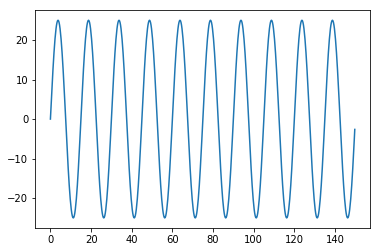

In [12]:
plt.plot(T, Y)

In [13]:
dT, dY = np.diff((T, Y))

In [14]:
cnc_sin = GCode.GCode()
for idx in range(len(dT)):
    cnc_sin.G1(X="{:.4f}".format(dT[idx]),
               Y="{:.4f}".format(dY[idx]))

In [15]:
class SoftKill(Exception):
    pass

In [16]:
try:
    cnc.run(init(laser=255))
    cnc.run(cnc_sin)
    cnc.run(end())
except KeyboardInterrupt:
    cnc.serial.flushOutput()
    cnc.cmd("!")
    cnc.reset()
    raise(SoftKill("Keyboard"))

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


AssertionError: 